<a href="https://colab.research.google.com/github/Asuskf/download_books_springer/blob/master/data_analisis_books_springer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data analysis books springer**
Toda el análisis que se realiza en este script fue tomado en base al los datos obtenidos de la web de cada uno de los libros.

![Web Springer](https://lh3.googleusercontent.com/proxy/P8DE6qmrM2Zzf2xWlP8QDK9Ff3zVnWD76kFetjOxa3c0xCMyQYaJiMdAuli3P_lfo4bJ5uewOVlG_yjv0aGUvTsHqkmvyresoVEiwvjAhKWpy1Ll96t5IsI2JbhJsdmV9Sui3445)


Se obtiene:


1.   **La frecuencia en las palabras clave (Que palabra clave es la más repetida)**
2.   **Número de libros por año**
3.   **Impacto del libro en la sociedad**
4.   **En el pack de libros cuantas veces se repite un autor**

**Nota:** Las partes del código que están comentadas sirven para realizar la descarga de los libros
# Herramientas usadas en el proyecto

## Expresiones regulares
![Expresiones regulares](https://relopezbriega.github.io/images/regex.png)

En cómputo teórico y teoría de lenguajes formales una expresión regular, o expresión racional, ​​ es una secuencia de caracteres que conforma un patrón de búsqueda.
 
**Link de ayuda:** https://relopezbriega.github.io/blog/2015/07/19/expresiones-regulares-con-python/

## Beautiful Soup 
![Beautiful Soup](https://funthon.files.wordpress.com/2017/05/bs.png?w=772)

Es una biblioteca de Python para analizar documentos HTML. Esta biblioteca crea un árbol con todos los elementos del documento y puede ser utilizado para extraer información. Por lo tanto, esta biblioteca es útil para realizar web scraping.

**Link de ayuda:** https://code.tutsplus.com/es/tutorials/scraping-webpages-in-python-with-beautiful-soup-the-basics--cms-28211

## Pandas 
![Pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png)
Es una biblioteca de software escrita como extensión de NumPy para manipulación y análisis de datos para el lenguaje de programación Python. 

**Link de ayuda:** https://www.youtube.com/watch?v=JJ7BMoQotEY&list=PLgHCrivozIb0ULMKfJVV-rFdRG2OeEgfq

## NumPy 
Es una extensión de Python, que le agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices.
![NUmpy](https://www.interactivechaos.com/sites/default/files/2019-01/portada_tutorial_numpy.jpg)

**Link de ayuda:** https://www.youtube.com/watch?v=WxJr143Os-A

## Matplotlib 
Es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays. 
![texto alternativo](https://matplotlib.org/_static/logo2_compressed.svg)

**Link de ayuda:**  https://matplotlib.org/

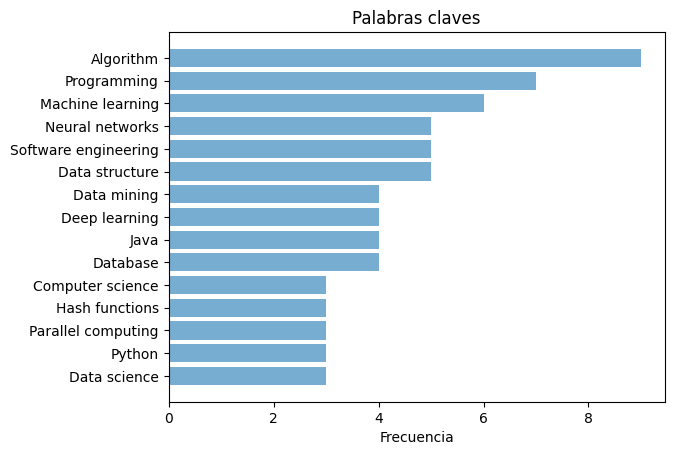

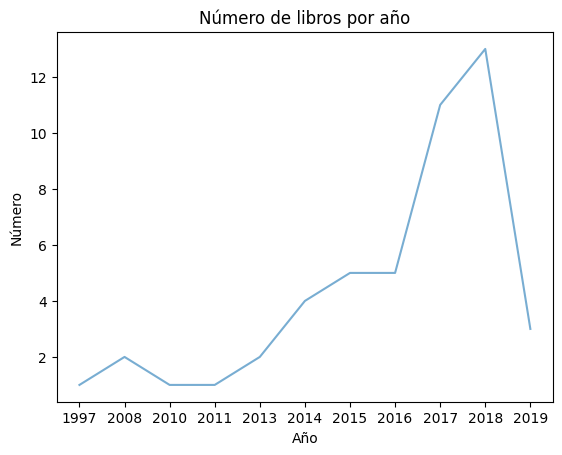

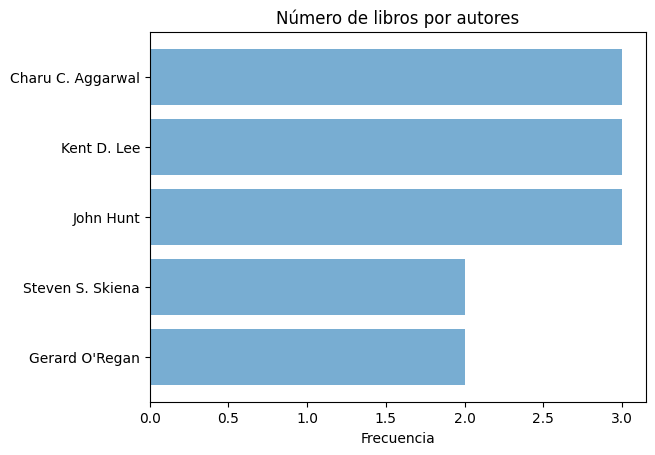

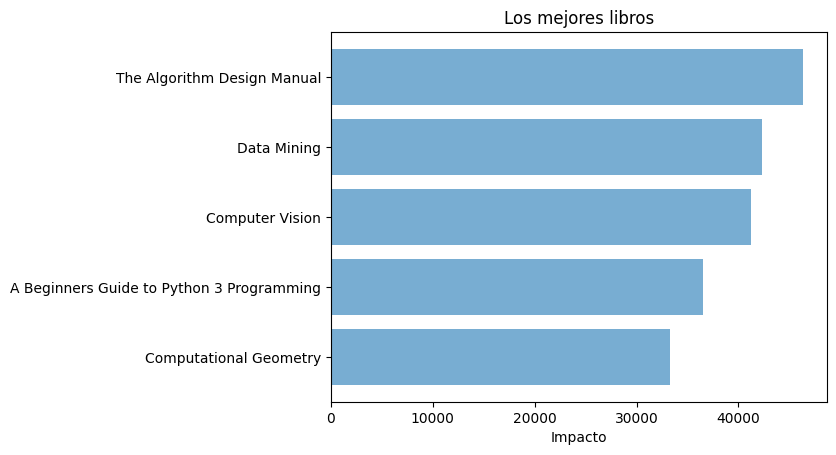

In [39]:
beautifulsoup4 = !pip list | grep -i beautifulsoup4
googledrivedownloader = !pip list | grep -i googledrivedownloader
pythonLevenshtein = !pip list | grep -i python-Levenshtein

if len(beautifulsoup4) == 0:
  !pip install beautifulsoup4

if len(googledrivedownloader) == 0:
  !pip install googledrivedownloader

if len(pythonLevenshtein) == 0:
  !pip install python-Levenshtein


import requests
import shutil
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen
import os
from google_drive_downloader import GoogleDriveDownloader as gdd
import re
import matplotlib.pyplot as plt

pathDocument= '/content/libros.csv'

if not os.path.exists(pathDocument):
  gdd.download_file_from_google_drive(file_id='1slse7jvELBMwoENYhyiUosKBcLofXpgE',
                                      dest_path=pathDocument,
                                      unzip=False)

def downloadBooks (title, link, tipe):
  myBook = urlopen(link)
  pageResponse = BeautifulSoup(myBook.read(),"html5lib")
  tags = list(str(pageResponse.findAll('span',{"class":"Keyword", "data-test": "book-keyword"})).replace(" </span", "").split('>'))[1::2]
  date = list(str(pageResponse.findAll('span',{"id":"copyright-info"},{"class":"bibliographic-information__value"})).replace("</span", "").split('>'))[1::2]
  year = date[0][-4:]
  citacions = list(str(pageResponse.findAll('span',{"id":"bookcitations-count-number"},{"class":"test-metric-count c-button-circle gtm-bookcitations-count"})).replace("</span", "").split('>'))[1::2]
  mentions = list(str(pageResponse.findAll('span',{"id":"bookmentions-count-number"},{"class":"test-metric-count c-button-circle gtm-bookmentions-count"})).replace("</span", "").split('>'))[1::2]
  dowloads = list(str(pageResponse.findAll('span',{"class":"test-metric-count article-metrics__views"})).replace("</span", "").split('>'))[1::2]
  #views = dowloads[0][:-1]
  views = dowloads[0]
  views = re.findall('\d+', views )
  propertiesList = [citacions, mentions, views]
  propertiesList = [0 if len(properties)==0 else int(properties[0]) for properties in propertiesList]
  importanceBook = (propertiesList[0] * 20)+ (propertiesList[1]*40) + (propertiesList[2] * 60)
  autors = list(str(pageResponse.findAll('span',{"class":"authors__name"}, {"itemprop":"name"})).replace("</span", "").split('>'))[1::2]
  nameAutors = [autor.replace('\xa0',' ') for autor in autors]
  
  """
  refBooks = [link['href'] for link in pageResponse.findAll('a', href=True) if re.findall(r'pdf$', link['href'])]
  urlBooks = 'https://link.springer.com'+refBooks[0]
  path_books = '/content/%s'% (tipe)
  
  if not os.path.exists(path_books):
    os.mkdir(path_books)
  
  book = requests.get(urlBooks, stream=True)
  
  with open('%s' % (path_books+'/'+title.replace(" ", "_").replace("/", "_")+'.pdf'), 'wb') as f:
    f.write(requests.get(urlBooks).content)
  """
  return tags, year, importanceBook, nameAutors
  

books = pd.read_csv("libros.csv")
type_books = 'Computer Science' #@param ['Behavioral Science and Psychology',  'Religion and Philosophy',  'Intelligent Technologies and Robotics',  'Computer Science',  'Business and Economics',  'Humanities, Social Sciences and Law',  'Energy',  'Mathematics and Statistics',  'Earth and Environmental Science',  'Medicine',  'Economics and Finance',  'Physics and Astronomy',  'Biomedical and Life Sciences',  'Literature, Cultural and Media Studies',  'Engineering',  'Social Sciences',  'Chemistry and Materials Science',  'Business and Management',  'Behavioral Science',  'Education',  'Law and Criminology'] {allow-input: true}
leaked_books = books[books['English Package Name'] == type_books]
books = dict(zip(leaked_books['Book Title'], leaked_books['OpenURL'].values.tolist()))
allTags = [downloadBooks(title, link, type_books) for title, link in books.items()]
listTags= [tags for tags, years, importance, nameAutors in allTags]
year= [years for tags, years, importance, nameAutors in allTags]
importanceBook = [importance for tags, years, importance, nameAutors in allTags]
nameAutors = [nameAutors for tags, years, importance, nameAutors in allTags]
"""
shutil.make_archive(type_books, 'zip', '/content/%s'% (type_books))
print('Descarga completa')
"""

listTags = [tags for listTags in dowloads for tags in listTags]
frecuenciaPalab2 = {word.capitalize().replace("-"," "):listTags.count(word) for word in listTags}
df2 = pd.DataFrame(frecuenciaPalab2.items(), columns=['palabra', 'frecuencia'])
df2.sort_values('frecuencia',ascending=False)

from Levenshtein import distance as levenshtein_distance
listLastWord = []


def replaceWords(word, listAllWords):
  listLastWord.append(word)
  findWord = [word for element in listLastWord if element == word]
  listAllWords.remove(word)
  wordsByReplace = {extractWord : word  for extractWord in listAllWords if levenshtein_distance(extractWord, word) < 2}
  return wordsByReplace
listWord = [replaceWords(word, df2['palabra'].values.tolist()) for word in df2['palabra'].values.tolist() if bool(replaceWords(word, df2['palabra'].values.tolist()))]
newList = {key:value for word in listWord for key, value in word.items()}
dropWord = sorted(list(newList))[1::2]

for word in dropWord:
  del newList[word]


def replaceWords(word):
  DataClean = [value for key, value in newList.items() if word == key]
  if bool(DataClean) == False:
    DataClean = word
  else:
    DataClean = DataClean[0]
  return DataClean

listTags = [replaceWords(tags.capitalize()) for listTags in dowloads for tags in listTags] 
frecuenciaPalab2 = {word:listTags.count(word) for word in listTags}
df2 = pd.DataFrame(frecuenciaPalab2.items(), columns=['palabra', 'frecuencia'])
df2 = df2.sort_values('frecuencia',ascending=False)
values = df2.loc[df2['frecuencia'] >=  3]
values

frecuenciaPalab2 = {word:listTags.count(word) for word in listTags}
df2 = pd.DataFrame(frecuenciaPalab2.items(), columns=['palabra', 'frecuencia'])
df2 = df2.sort_values('frecuencia',ascending=False)
values = df2.loc[df2['frecuencia'] >=  3]

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = values['palabra'].values.tolist()
y_pos = np.arange(len(objects))[::-1]
performance = values['frecuencia'].values.tolist()

plt.barh(y_pos, performance, align='center', alpha=0.6)
plt.yticks(y_pos, objects)
plt.xlabel('Frecuencia')
plt.title('Palabras claves')
plt.show()

date = {word:year.count(word) for word in year}
dfYears = pd.DataFrame(date.items(), columns=['Anio', 'frecuencia'])
dfYears = dfYears.sort_values('Anio')
dfYears

anio = dfYears['Anio'].values.tolist()
y_pos = np.arange(len(anio))
performance = dfYears['frecuencia'].values.tolist()

plt.plot(y_pos, performance, alpha=0.6)
plt.xticks(y_pos,anio)
plt.xlabel('Año')
plt.ylabel('Número')
plt.title('Número de libros por año')
plt.show()

better_book = leaked_books[['Book Title', 'Author', 'OpenURL']]
better_book = better_book.drop_duplicates(better_book.columns[~better_book.columns.isin(['OpenURL'])],
                        keep='first')
better_book = better_book.assign(Importance= importanceBook)
better_book = better_book.sort_values('Importance',ascending=False)
better_book.head(5)
allAutors = [autors for names in nameAutors for autors in names]
frecuenciaAutors = {word:allAutors.count(word) for word in allAutors}
dfAutors = pd.DataFrame(frecuenciaAutors.items(), columns=['Autores', 'frecuencia'])
dfAutors = dfAutors.sort_values('frecuencia',ascending=False)
dfAutors = dfAutors.loc[dfAutors['frecuencia'] >=  2]
dfAutors

objects = dfAutors['Autores'].values.tolist()
y_pos = np.arange(len(objects))[::-1]
performance = dfAutors['frecuencia'].values.tolist()

plt.barh(y_pos, performance, align='center', alpha=0.6)
plt.yticks(y_pos, objects)
plt.xlabel('Frecuencia')
plt.title('Número de libros por autores')
plt.show()

dfNetterBooks = better_book.head(5)
objects = dfNetterBooks['Book Title'].values.tolist()
y_pos = np.arange(len(objects))[::-1]
performance = dfNetterBooks['Importance'].values.tolist()
plt.barh(y_pos, performance, align='center', alpha=0.6)
plt.yticks(y_pos, objects)
plt.xlabel('Impacto')
plt.title('Los mejores libros')
plt.show()
